# Differencing

In [27]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt

In [2]:
goog200 = pd.read_csv('Data/goog200.csv')

Text(0.5, 1.0, 'Series: diff(goog200)')

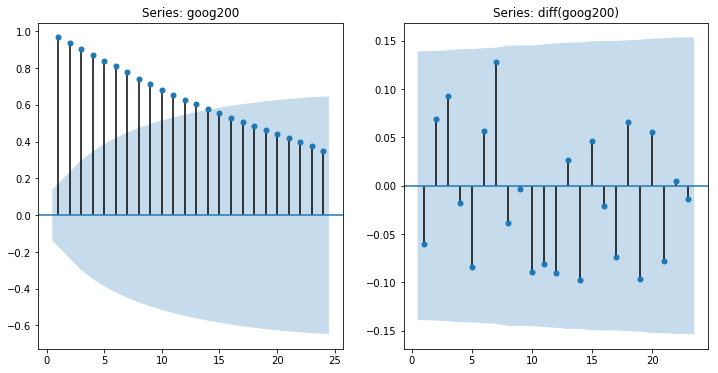

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
acf = statsmodels.graphics.tsaplots.plot_acf(goog200, zero=False, ax=ax1)
acf_diff = statsmodels.graphics.tsaplots.plot_acf(goog200.diff()[1:], zero=False, ax=ax2)
ax1.set_title('Series: goog200')
ax2.set_title('Series: diff(goog200)')


## Ljung-Box test

In [4]:
res = acorr_ljungbox(goog200.diff()[1:], lags=10)
print('Ljung-Box test statistic: ', res[0][-1])
print('Ljung-Box test p-value: ', res[1][-1])

Ljung-Box test statistic:  11.031435564867591
Ljung-Box test p-value:  0.3550741314470055


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


# Seasonal Differencing

## Antidiabetic drug sales

Text(0.5, 1.0, 'Annual change in log sales')

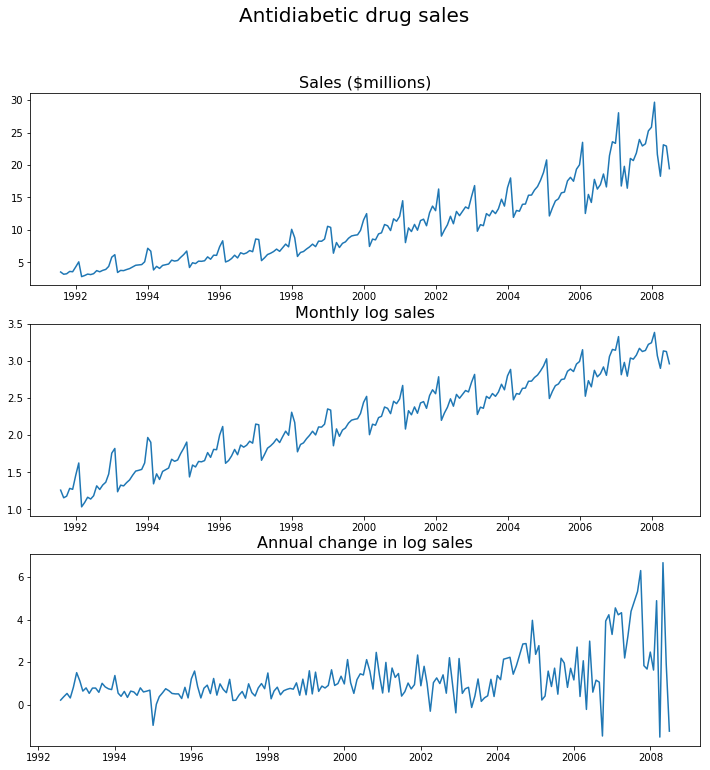

In [19]:
a10 = pd.read_csv('Data/a10.csv')
a10.index = pd.date_range(start='1991-07-31', end='2008-06-30', freq='M').to_pydatetime()

#Log transformation and seasonal differencing
a10_log = np.log(a10)
a10_diff = a10.diff(12)

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,12))
ax1.plot(a10.index, a10.values)
ax2.plot(a10.index, a10_log.values)
ax3.plot(a10.index, a10_diff.values)

fig.suptitle("Antidiabetic drug sales", fontsize=20)
ax1.set_title('Sales ($millions)', fontsize=16)
ax2.set_title('Monthly log sales', fontsize=16)
ax3.set_title('Annual change in log sales', fontsize=16)

## US electricity generation

Text(0.5, 1.0, 'Doubly differenced logs')

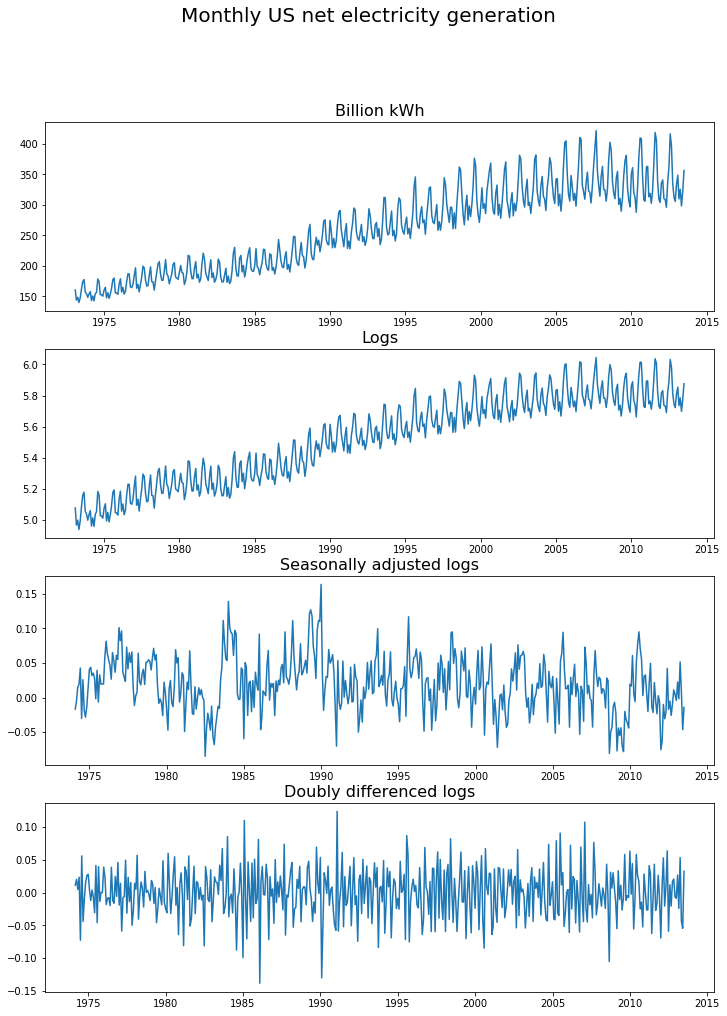

In [20]:
usmelec = pd.read_csv('Data/usmelec.csv')
usmelec.index = pd.date_range(start='1973-01-31', end='2013-06-30', freq='M').to_pydatetime()

usmelec_log = np.log(usmelec)
usmelec_seas_diff = usmelec_log.diff(12)
usmelec_double_diff = usmelec_seas_diff.diff()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12,16))
ax1.plot(usmelec.index, usmelec.values)
ax2.plot(usmelec.index, usmelec_log.values)
ax3.plot(usmelec.index, usmelec_seas_diff.values)
ax4.plot(usmelec.index, usmelec_double_diff.values)

fig.suptitle("Monthly US net electricity generation", fontsize=20)
ax1.set_title('Billion kWh', fontsize=16)
ax2.set_title('Logs', fontsize=16)
ax3.set_title('Seasonally adjusted logs', fontsize=16)
ax4.set_title('Doubly differenced logs', fontsize=16)

In [29]:
goog = pd.read_csv('Data/goog.csv')
kpss(goog, nlags=7)

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1740: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn(warn_msg.format(direction="smaller"), InterpolationWarning)


(10.722310406165242,
 0.01,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})